# Car Insurance Claim Prediction

Predict whether the policyholder will file a claim in the next 6 months or not. 

Dataset from: https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification

## Import Libraries 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Import Dataset

In [114]:
DF = pd.read_csv('Data/train.csv')

In [115]:
DF

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


## Data Exploration

In [116]:
# Check for Null Values
DF.isnull().values.any()

False

In [117]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

**Columns Grouping**

0. policy_id (object): unique identifier - Remove 
1. policy_tenure (float64): Time period of the policy - Policy                    
2. age_of_car (float64): Normlised age of the car in years - Car
3. age_of_policyholder (float64): Normalised age of policyholder in years - Policyholder
4. area_cluster (object): Area cluster of the policyholder - Policyholder 
5. population_density (int64): Population density of the city - Policyholder   
6. make (int64): Encoded Manufacturer/company of the car - Car  
7. segment (object): Segment of the car (A/B1/B2/C1/C2) - Car 
8. model (object): Encoded name of the car - Car 
9. fuel_type (object): Type of fuel used by the car - Car 
10. max_torque (object): Maximum Torque generated by the car (Nm@rpm) - Car  
11. max_power (object): Maximum Power generated by the car (bhp@rpm) - Car 
12. engine_type (object): Type of engine used in the car - Car 
13. airbags (int64): Number of airbags installed in the car - Car  
14. is_esc (object): Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not - Car 
15. is_adjustable_steering (object): Boolean flag indicating whether the steering wheel of the car is adjustable or not - Car
16. is_tpms (object): Boolean flag indicating whether Typre Pressure Monitoring System (TPMS) is present in the car or not - Car 
17. is_parking_sensors (object): Boolean flag indicating whether parking sensors are present in the car or not - Car 
18. is_parking_camera (object): Boolean flag indicating whether the parking camera is present in the car or not - Car 
19. rear_brakes_type (object): Type of breakes used in the rear of the car - Car 
20. displacement (int64): Engine displacement of the car (cc) - Car  
21. cylinder (int64): Number of cylinders present in the engine of the car - Car  
22. transmission_type (object): Transmission type of the car (auto or manual) - Car 
23. gear_box (int64): Number of gears in the car - Car  
24. steering_type (object): Type of the power steering present in the car (Power or Electric) - Car 
25. turning_radius (float64): The space a vehicle needs to make a certain turn (Meters) - Car
26. length (int64): Length of the car (millimetre) - Car  
27. width (int64): Width of the car (millimetre) - Car  
28. height (int64): Height of the car (millimetre) - Car  
29. gross_weight (int64): The maximum allowable weight of the fully-loaded car, inclduing passengers, cargo and equipment (Kg) - Car  
30. is_front_fog_lights (object): Boolean flag indicating whether front fog lights are available in the car or not - Car 
31. is_rear_window_wiper (object): Boolean flag indicating whether rear window wiper is available in the car or not - Car 
32. is_rear_window_washer (object): Boolean flag indicating whether rear window washer is available in the car or not - Car 
33. is_rear_window_defogger (object): Boolean flag indicating whether rear window defogger is available in the car or not - Car 
34. is_brake_assist (object): Boolean flag indicating whether the brake assistance feature is available in the car or not - Car 
35. is_power_door_locks (object): Boolean flag indicating whether a power door lock is avialble in the car or not - Car 
36. is_central_locking (object): Boolean flag indicating whether the central locking feature is available in the car or not - Car 
37. is_power_steering (object): Boolean flag indicating whether power steering is available in the car or not - Car 
38. is_driver_seat_height_adjustable (object): Boolean flag indicating whether the height of the driver seat is adjustable or not - Car 
39. is_day_night_rear_view_mirror (object): Boolean flag indicating whether day & night rearview mirror is present in the car or not - Car 
40. is_ecw (object): Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not - Car 
41. is_speed_alert (object): Boolean flag indicating whether the speed alert system is available in the car or not - Car 
42. ncap_rating (int64): Safety rating given by NCAP (out of 5) - Car  
43. is_claim (int64): Boolean flag indicating whether the policyholder file a claim in the next 6 months or not   

In [118]:
DF.drop(columns = 'policy_id', inplace = True)

In [119]:
# Separate Y and X Variables
Y_Variable = 'is_claim'
Y_DF = DF[Y_Variable] 
X_DF = DF.drop([Y_Variable], axis=1)

### Categorical Variables

In [120]:
# Get categorical variables
Category_DF = DF.select_dtypes(exclude = [np.number])
Category_DF

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


<AxesSubplot: >

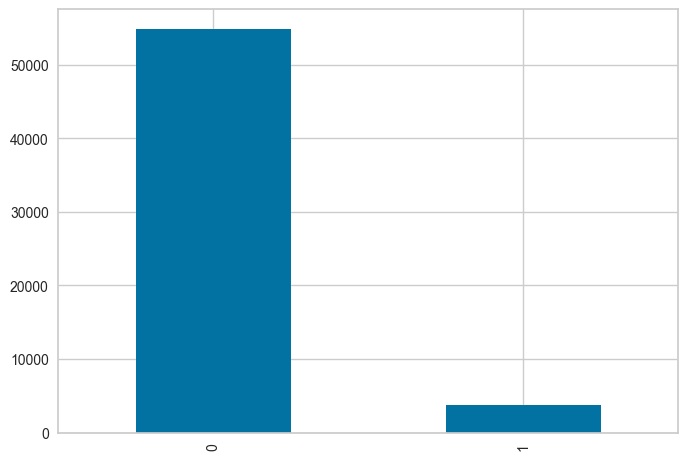

In [121]:
DF[Y_Variable].value_counts().plot(kind='bar')

**Very imbalanced data**

Consider ways of dealing with imbalanced dataset https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/:

---------------------------------------------------------------------------------------------------------

**Choose Proper Evaluation Metrics - F1 Score (which is a combination of both precision and recall)** 
https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

---------------------------------------------------------------------------------------------------------

**Accuracy**

- Easy to 'cheat' the score.... As only small set of sample is positives 

**Precision** = TP / (TP + FP)

- How many of the positive predictions made are correct (true positives). Great if you want to minimize false positives (e.g. spam email). It's also not affected by the negatively imbalanced dataset (where there is more negatives than positives occurence).


**Recall/Sensitivity** = TP / (TP + FN)

- How many of the positive cases the classifier correctly predicted, over all the positive cases in the data. Used when you want to minize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive. 

**Specificity** = TN / (TN + FP)

**F1 Score** = 2*(Precision * Recall) / (Precision + Recall)

- Combines precision and recall, and works also for cases where the datasets are imbalanced as it requires both precision and recall to have a reasonable value.

---------------------------------------------------------------------------------------------------------

**ROC/AUC**

---------------------------------------------------------------------------------------------------------

**ROC (Receiver Operator Characteristics)**

-- Every points on the curve shows different probability threshold (e.g. 0.5, 0.7 etc) used in the classification model and the resulting recall/sensitivity and precision/or specificity for each respective confusion matrix.

**AUC (Area Under the Curve)**

-- Calculates the area under the curver and this can be used to compare the performance of different classification models. Higher AUC means higher scores in true positive and true negative rates. 

---------------------------------------------------------------------------------------------------------

**Resampling (oversampling and undersampling)**

---------------------------------------------------------------------------------------------------------

- Oversampling - Randomly duplicating samples from the minority class in the training dataset (could lead to overfitting for some models)

- Undersampling - Randomly deleting samples from the majority class (could result in losing invaluable information)

---------------------------------------------------------------------------------------------------------

**Synthetic Minority Oversampling Technique (SMOTE)**

---------------------------------------------------------------------------------------------------------

- New instances are synthesized from the existing data. SMOTE looks into minority class instances and use k nearest neighbour to select a random nearest neighbour, and a synthetic instance is created randomly in feature space. 

---------------------------------------------------------------------------------------------------------

**BalancedBaggingClassifier**

---------------------------------------------------------------------------------------------------------

**Threshold Moving**

---------------------------------------------------------------------------------------------------------

- Change the classifier probability threshold, 50%, which is usually adopted for the balanced 50/50 dataset so that it can efficiently separate two classes. 


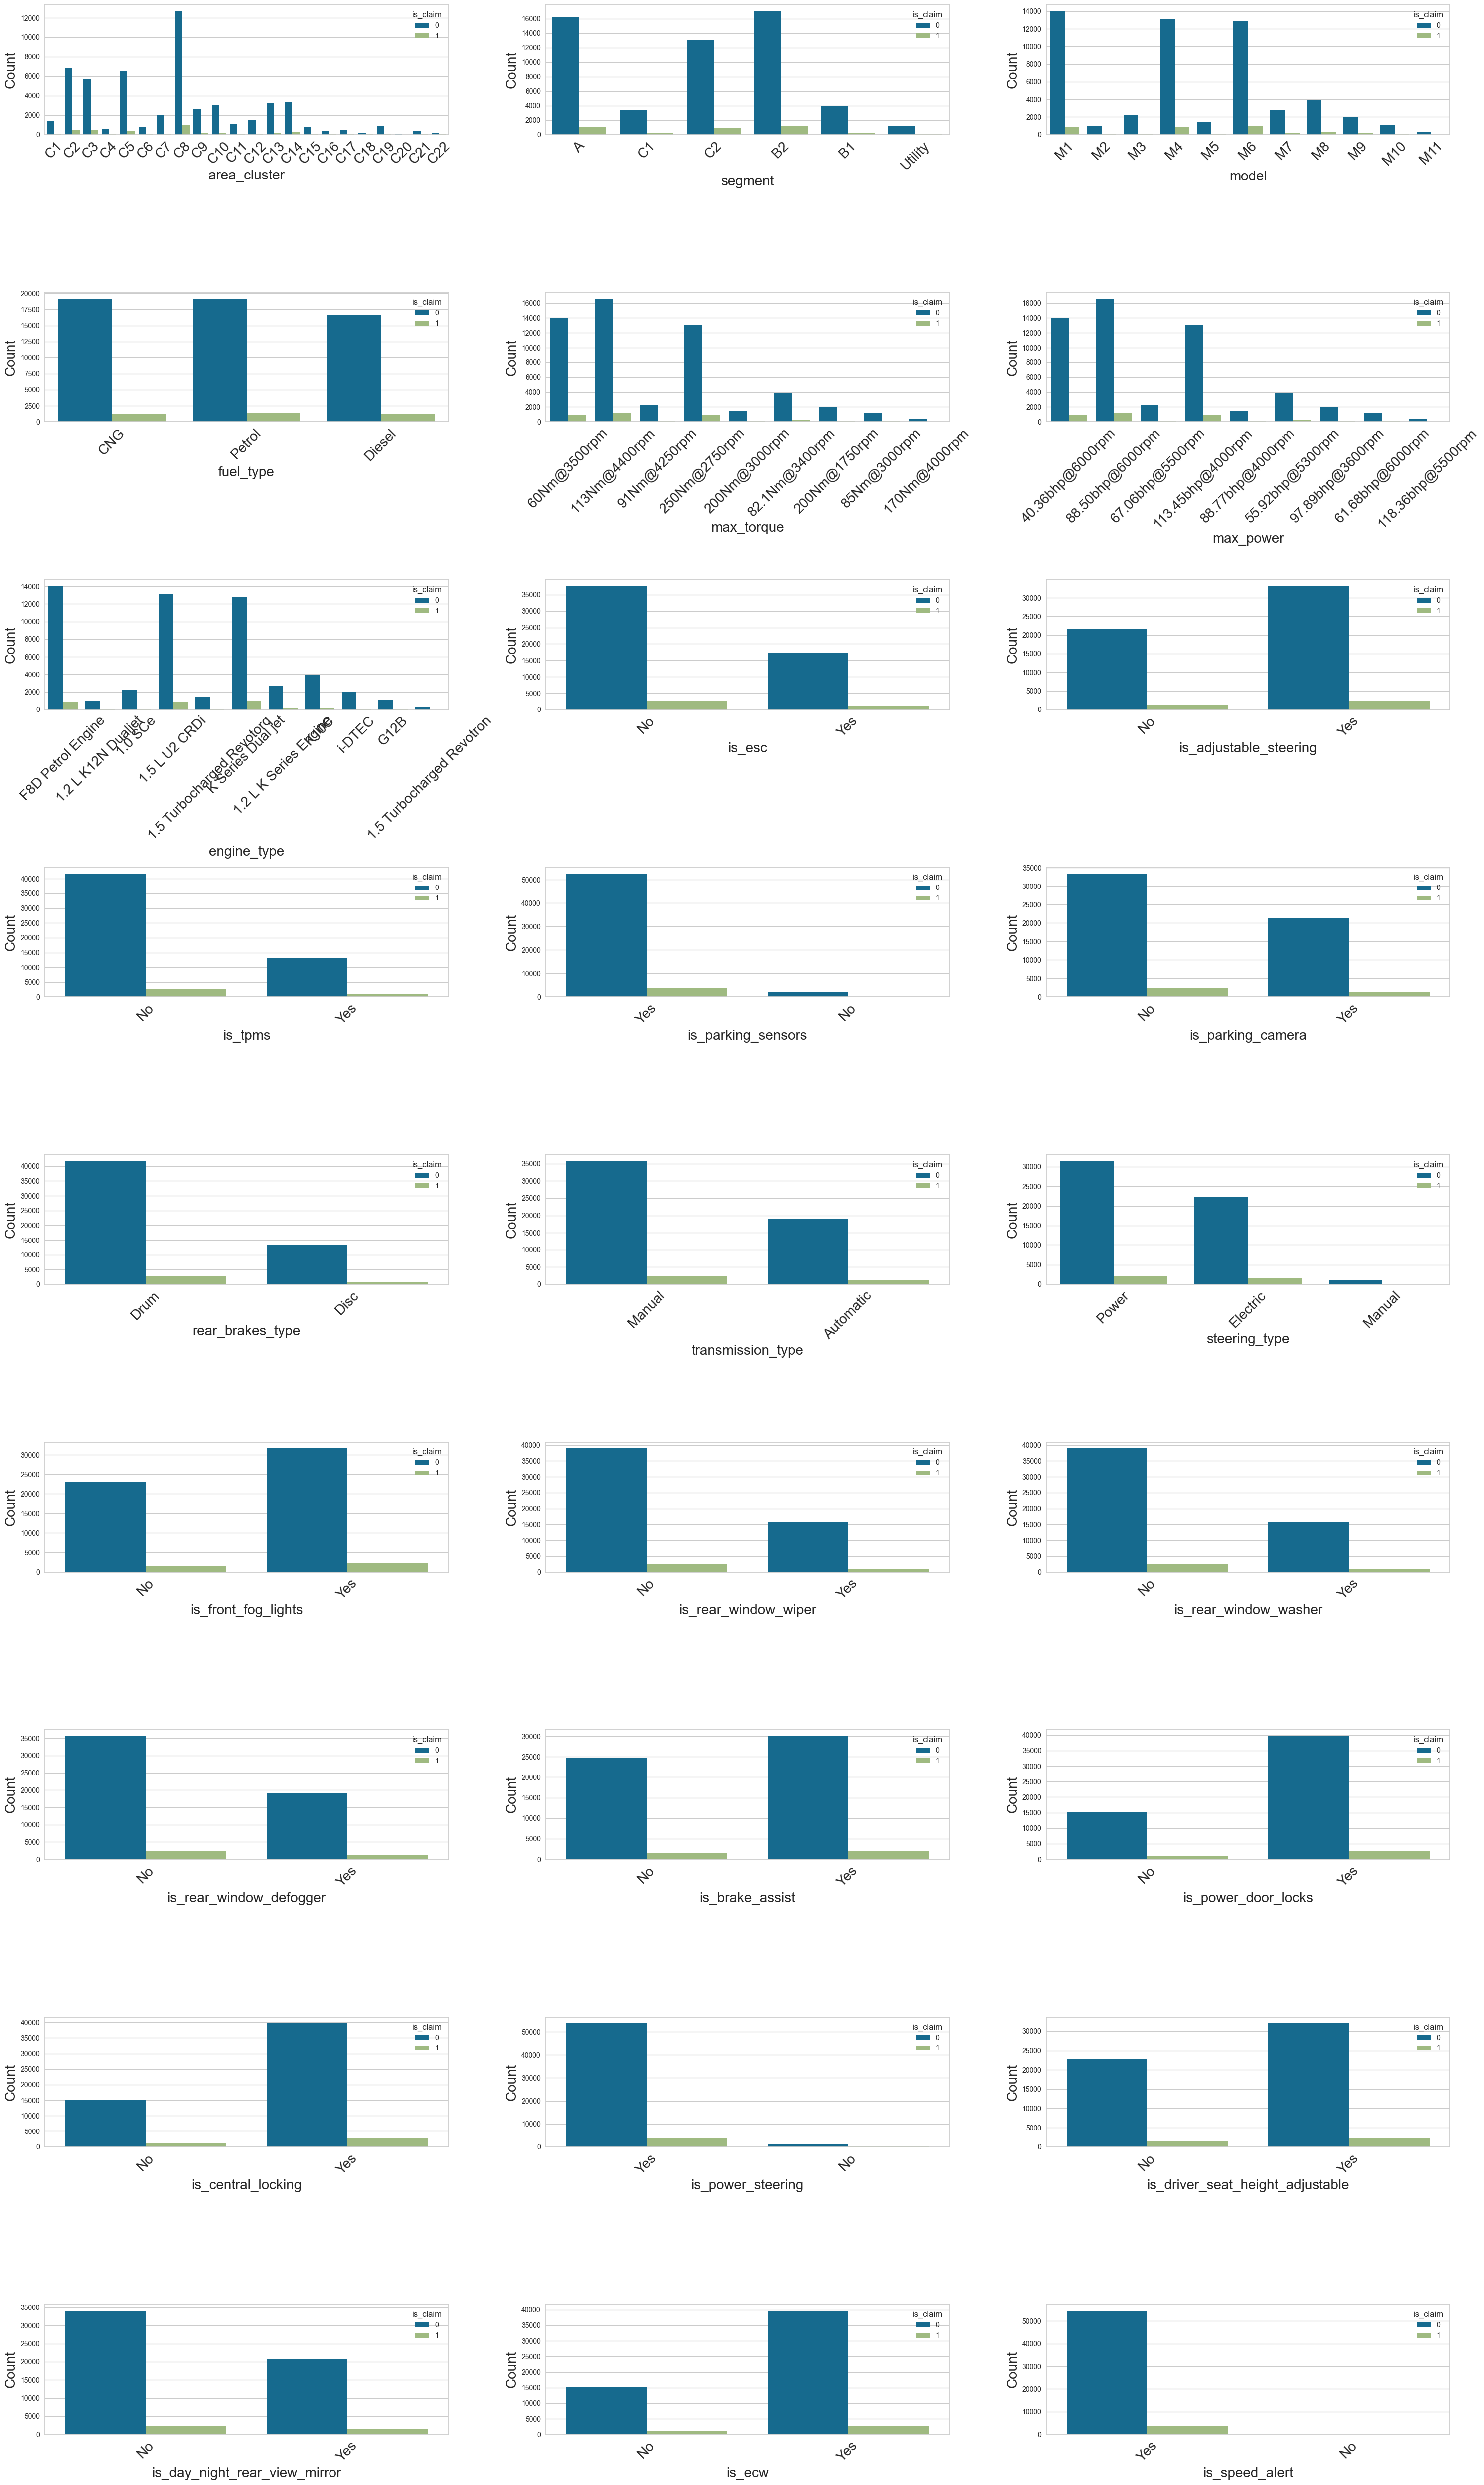

In [122]:
## VISUALIZE CATEGORICAL VARIABLES
y_label = 'Count'

# Plotting each of the input variable against the count of policyholder that have filed a claim
ncols = 3
nrows = len(Category_DF.columns)//ncols

fig, axs = plt.subplots(nrows, ncols, figsize = (30, 50))
axs = axs.flatten()

for i, col in enumerate(Category_DF.columns):
    ax = axs[i]
    sns.countplot(data = DF, 
                  x= col, ax = ax, 
                  hue = 'is_claim')
    
    ax.set_ylabel(y_label, fontsize = 20)
    ax.set_xlabel(col, fontsize = 20)
    ax.tick_params(axis='x', rotation=45, labelsize = 20)
    
plt.tight_layout()
plt.show()
                  

### Numerical Variables

In [123]:
# Get numerical variables
Numerical_DF = DF.drop(Category_DF, axis = 1)
Numerical_DF

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0
58588,1.199642,0.02,0.519231,7788,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58589,1.162273,0.05,0.451923,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58590,1.236307,0.14,0.557692,8794,1,2,1197,4,5,4.8,3845,1735,1530,1335,2,0


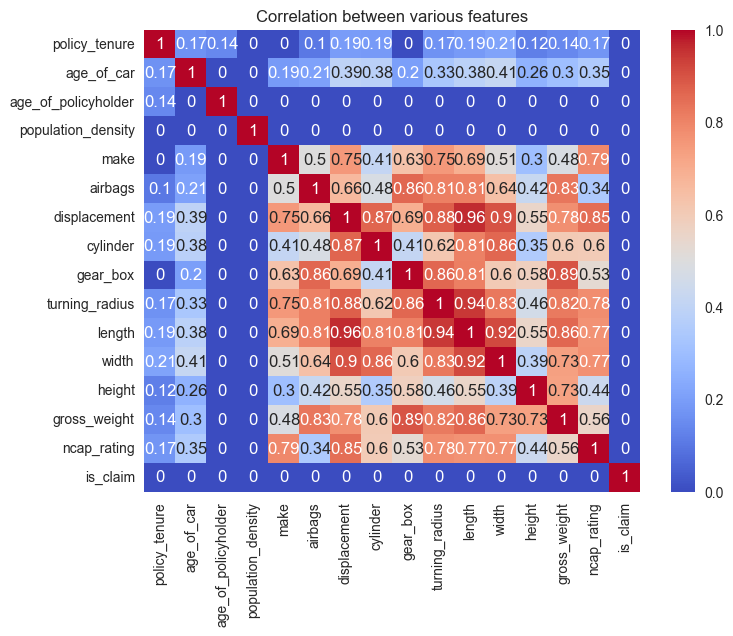

In [124]:
# Visualizing the correlation using heatmaps from seaborn library

highcorr = Numerical_DF.corr()
highcorr[np.abs(highcorr < 0.1)] = 0
plt.figure(figsize=(8,6))
sns.heatmap(highcorr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()# Visualizing the correlation using heatmaps from seaborn library

There is no correlation between the target variables and the rest of numerical variables. Could be removed from the datatset?

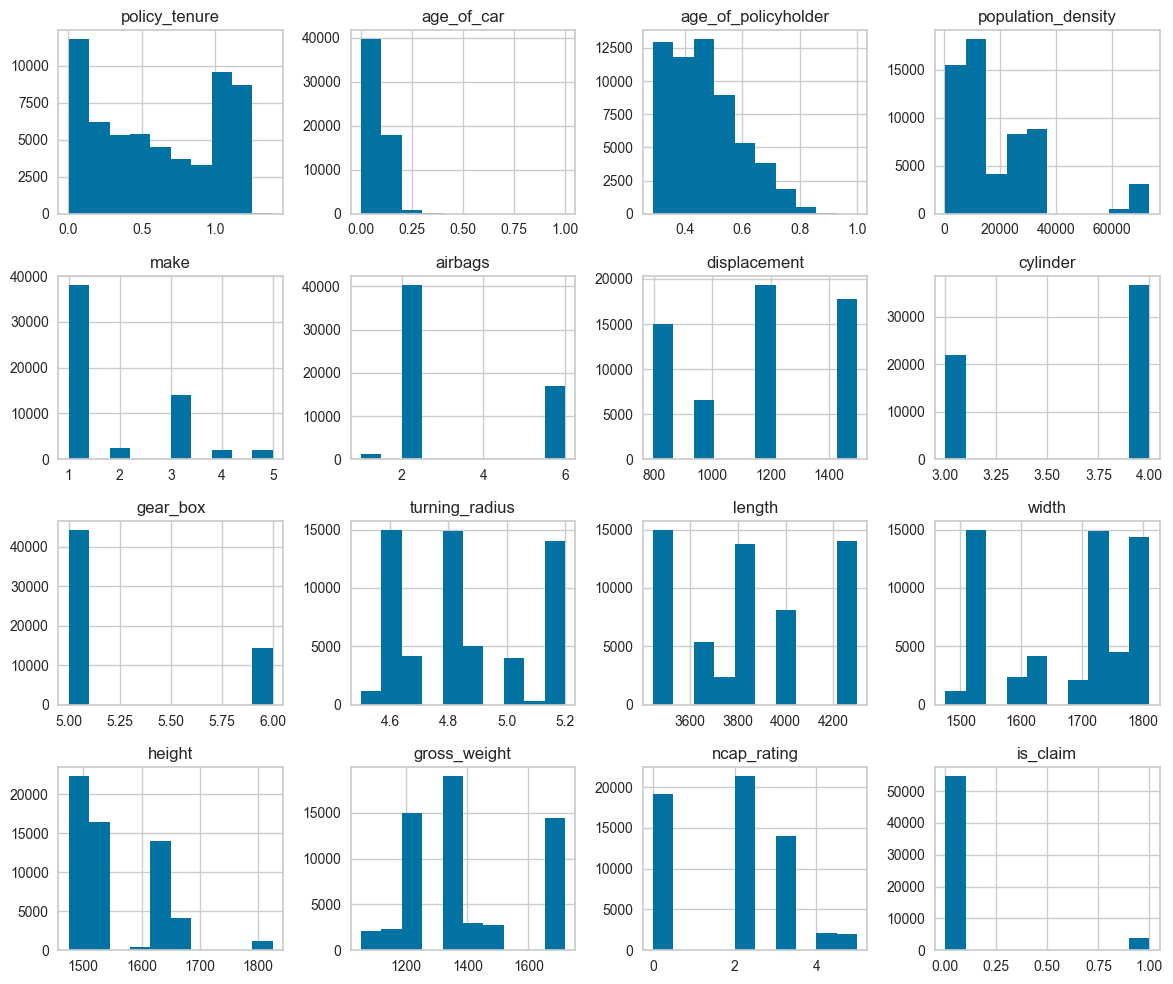

In [125]:
DF.hist(figsize=(12, 10))
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

## Data Processing

### Categorical Variables

**For non-tree based modelling**
- Convert all the binaries to 0 and 1 (label encoding).
- For categorical variables with more than 2 values will be one-hot encoded.

**Ordinal Data (has an order):** max_torque, max_power, segment

**Nominal (no order):** area_cluster, segment, model, fuel_type, engine_type, steering_type

**Binary:** is_esc, is_adjustable_steering, is_tpms, is_parking_sensors, is_parking_camera, rear_brakes_type, transmission_type,
is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_brake_assist, is_power_door_locks, 
is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw, is_speed_alert

**Multiclass:** area_cluster, model, fuel_type, engine_type, steering_type

#### Segment

Label encode or one hot encoding?

Generally A < B < C in terms of sizes. 

Utility vehicle - a truck with low sides designed for carry small loads. Because it's in a small portion, it could be classified into an infrequent category with any other unknown categories from the non-training dataset? (check for the sample size).

In [126]:
DF['segment'].value_counts()

B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64

Keep utility as its own category and assigns A < B < C < Utility using label encoding

In [127]:
# Import library
from sklearn.preprocessing import OrdinalEncoder

In [128]:
# Initi Ordinal Encoder
OE = OrdinalEncoder(categories = [['A', 'B1', 'B2', 'C1', 'C2', 'Utility']])

# Convert to numerical values 
DF['segment'] = OE.fit_transform(DF[['segment']])

In [129]:
# Check if it's properly encoded
DF['segment'].value_counts()

2.0    18314
0.0    17321
4.0    14018
1.0     4173
3.0     3557
5.0     1209
Name: segment, dtype: int64

#### Torque

**Nm = Newton per Metre, rpm = Revolutions per Minute (measure of how fast the engine is spinning)**

Could standardize torque and power by rpm. 

High torque:

- has higher acceleration
- at lower rpm it's more energy efficient
- more towing capacity

Low torque:

- tends to operates at higher rpm for speed
- better fuel economy (ideal for city commuting and long distance travel when fuel costs are a concern)
- smooth power delivery: these engines provide a smoother and more gradual power delivery, which is appreciated in stop-and-go traffic and during motorway cruising  
- weight savings: smaller engines are typically lighter, contributing to improved handling and agility in smaller vehicles


In [130]:
DF['max_torque'].value_counts()

113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64

In [131]:
# STANDARDIZE THE TORQUE TO RPM RATIO
# regex - digit (decimal or int) before Nm and rpm
DF['torque'] = DF['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
DF['rpm'] = DF['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
DF['torque'] = pd.to_numeric(DF['torque'])
DF['rpm'] = pd.to_numeric(DF['rpm'])

# Calculate torque to RPM ratio 
DF['torque per rpm'] = DF['torque'] / DF['rpm']

In [132]:
DF['torque per rpm'].value_counts()

0.025682    17796
0.017143    14948
0.090909    14018
0.024147     4173
0.021412     2373
0.114286     2114
0.066667     1598
0.028333     1209
0.042500      363
Name: torque per rpm, dtype: int64

In [133]:
# Drop columns
DF.drop(columns = ['max_torque', 'torque', 'rpm'], inplace = True)

for col in DF.columns:
    print(col)

policy_tenure
age_of_car
age_of_policyholder
area_cluster
population_density
make
segment
model
fuel_type
max_power
engine_type
airbags
is_esc
is_adjustable_steering
is_tpms
is_parking_sensors
is_parking_camera
rear_brakes_type
displacement
cylinder
transmission_type
gear_box
steering_type
turning_radius
length
width
height
gross_weight
is_front_fog_lights
is_rear_window_wiper
is_rear_window_washer
is_rear_window_defogger
is_brake_assist
is_power_door_locks
is_central_locking
is_power_steering
is_driver_seat_height_adjustable
is_day_night_rear_view_mirror
is_ecw
is_speed_alert
ncap_rating
is_claim
torque per rpm


#### Power

**bhp = brake horsepower, rpm = Revolutions per Minute (measure of how fast the engine is spinning)**

https://www.autotrader.co.uk/content/advice/what-are-horsepower-and-torque-and-why-does-it-matter?refresh=true

Brake horsepower refers to the horsepower of the car after taking into consideration friction between a car’s tyres and the road.


In [134]:
DF['max_power'].value_counts()

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64

In [135]:
# STANDARDIZE THE TORQUE TO RPM RATIO
# regex - digits (decimal or int) before bhp and rpm
DF['power'] = DF['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
DF['rpm'] = DF['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
DF['power'] = pd.to_numeric(DF['power'])
DF['rpm'] = pd.to_numeric(DF['rpm'])

# Calculate torque to RPM ratio 
DF['power per rpm'] = DF['power'] / DF['rpm']

In [136]:
DF['power per rpm'].value_counts()

0.014750    17796
0.006727    14948
0.028363    14018
0.010551     4173
0.012193     2373
0.027192     2114
0.022193     1598
0.010280     1209
0.021520      363
Name: power per rpm, dtype: int64

In [137]:
# Drop columns
DF.drop(columns = ['max_power', 'power', 'rpm'], inplace = True)

for col in DF.columns:
    print(col)

policy_tenure
age_of_car
age_of_policyholder
area_cluster
population_density
make
segment
model
fuel_type
engine_type
airbags
is_esc
is_adjustable_steering
is_tpms
is_parking_sensors
is_parking_camera
rear_brakes_type
displacement
cylinder
transmission_type
gear_box
steering_type
turning_radius
length
width
height
gross_weight
is_front_fog_lights
is_rear_window_wiper
is_rear_window_washer
is_rear_window_defogger
is_brake_assist
is_power_door_locks
is_central_locking
is_power_steering
is_driver_seat_height_adjustable
is_day_night_rear_view_mirror
is_ecw
is_speed_alert
ncap_rating
is_claim
torque per rpm
power per rpm


#### Binary Data - Lebel Encoding

In [138]:
# Import library
from sklearn.preprocessing import LabelEncoder 

In [139]:
# Binary columns
Binary_Col = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 
              'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 
              'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

In [140]:
# Initi Label Encoder
LE = LabelEncoder()

# Convert to numerical values - 0 or 1
DF[Binary_Col] = DF[Binary_Col].apply(LE.fit_transform)

In [141]:
#Check if the encoding is applied 
DF

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque per rpm,power per rpm
0,0.515874,0.05,0.644231,C1,4990,1,0.0,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
1,0.672619,0.02,0.375000,C2,27003,1,0.0,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
2,0.841110,0.02,0.384615,C3,4076,1,0.0,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
3,0.900277,0.11,0.432692,C4,21622,1,3.0,M2,Petrol,1.2 L K12N Dualjet,...,1,1,1,1,1,1,2,0,0.025682,0.014750
4,0.596403,0.11,0.634615,C5,34738,2,0.0,M3,Petrol,1.0 SCe,...,1,1,0,1,1,1,2,0,0.021412,0.012193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,0.0,M3,Petrol,1.0 SCe,...,1,1,0,1,1,1,2,0,0.021412,0.012193
58588,1.199642,0.02,0.519231,C14,7788,1,0.0,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
58589,1.162273,0.05,0.451923,C5,34738,1,0.0,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
58590,1.236307,0.14,0.557692,C8,8794,1,2.0,M6,Petrol,K Series Dual jet,...,1,1,1,1,1,1,2,0,0.025682,0.014750


#### Multiclass Variables - One Hot Encoding

In [142]:
DF['area_cluster'].value_counts()

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

In [143]:
# Club all the city areas with sample < 1000 into C_Others

Frequencies = DF['area_cluster'].value_counts()
Min_Frequency = Frequencies < 1000   
Mask_Obs = Frequencies[Min_Frequency].index
Mask_Dict = dict.fromkeys(Mask_Obs, 'C_Others')

DF['area_cluster'] = DF['area_cluster'].replace(Mask_Dict)

In [144]:
DF['area_cluster'].value_counts()

C8          13654
C2           7342
C5           6979
C3           6101
C_Others     5108
C14          3660
C13          3423
C10          3155
C9           2734
C7           2167
C12          1589
C1           1468
C11          1212
Name: area_cluster, dtype: int64

In [145]:
# Import Library
from sklearn.preprocessing import OneHotEncoder

In [146]:
Multi_Col = ['area_cluster', 'model', 'fuel_type', 'engine_type', 'steering_type']

In [147]:
# Init One Hot Encoder
OHE = OneHotEncoder(handle_unknown = 'ignore') # ignore unseen category from non-training dataset when running a model 

In [152]:
Multi_Encoded = OHE.fit_transform(DF[Multi_Col])
Multi_Encoded = pd.DataFrame(Multi_Encoded.toarray())
Multi_Encoded

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58588,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [149]:
Encoded_Col = [f'{col}_{cat}' for i, col in enumerate(Multi_Col) for cat in OHE.categories_[i]]
Encoded_Col

['area_cluster_C1',
 'area_cluster_C10',
 'area_cluster_C11',
 'area_cluster_C12',
 'area_cluster_C13',
 'area_cluster_C14',
 'area_cluster_C2',
 'area_cluster_C3',
 'area_cluster_C5',
 'area_cluster_C7',
 'area_cluster_C8',
 'area_cluster_C9',
 'area_cluster_C_Others',
 'model_M1',
 'model_M10',
 'model_M11',
 'model_M2',
 'model_M3',
 'model_M4',
 'model_M5',
 'model_M6',
 'model_M7',
 'model_M8',
 'model_M9',
 'fuel_type_CNG',
 'fuel_type_Diesel',
 'fuel_type_Petrol',
 'engine_type_1.0 SCe',
 'engine_type_1.2 L K Series Engine',
 'engine_type_1.2 L K12N Dualjet',
 'engine_type_1.5 L U2 CRDi',
 'engine_type_1.5 Turbocharged Revotorq',
 'engine_type_1.5 Turbocharged Revotron',
 'engine_type_F8D Petrol Engine',
 'engine_type_G12B',
 'engine_type_K Series Dual jet',
 'engine_type_K10C',
 'engine_type_i-DTEC',
 'steering_type_Electric',
 'steering_type_Manual',
 'steering_type_Power']

In [155]:
Multi_Encoded.columns = Encoded_Col
Multi_Encoded

,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C2,area_cluster_C3,area_cluster_C5,area_cluster_C7,...,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,steering_type_Electric,steering_type_Manual,steering_type_Power
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58588,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [158]:
DF_Ready = DF.join(Multi_Encoded)
DF_Ready.drop(columns = Multi_Col, inplace = True)
DF_Ready

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,airbags,is_esc,is_adjustable_steering,is_tpms,...,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,1,0.0,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.672619,0.02,0.375000,27003,1,0.0,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.841110,0.02,0.384615,4076,1,0.0,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.900277,0.11,0.432692,21622,1,3.0,2,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.596403,0.11,0.634615,34738,2,0.0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,0.0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58588,1.199642,0.02,0.519231,7788,1,0.0,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58589,1.162273,0.05,0.451923,34738,1,0.0,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58590,1.236307,0.14,0.557692,8794,1,2.0,2,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Model Training - PyCaret

In [63]:
#Load Libraries
from pycaret.classification import *

### Model 1 (Default setting)

In [64]:
# Setup Pycaret modelling - using OOP 
clf1 = ClassificationExperiment()
type(clf1)

pycaret.classification.oop.ClassificationExperiment

In [65]:
clf1.setup(data = DF, target = 'is_claim', session_id = 123)

,Description,Value
0,Session id,123
1,Target,is_claim
2,Target type,Binary
3,Original data shape,"(58592, 43)"
4,Transformed data shape,"(58592, 93)"
5,Transformed train set shape,"(41014, 93)"
6,Transformed test set shape,"(17578, 93)"
7,Ordinal features,19
8,Numeric features,17
9,Categorical features,25


#### Compare Model

In [66]:
clf1.compare_models(sort = 'precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9332,0.5210,0.0076,0.1210,0.0143,0.0073,0.0152,0.4010
gbc,Gradient Boosting Classifier,0.9359,0.6490,0.0004,0.1000,0.0008,0.0005,0.0042,0.9060
rf,Random Forest Classifier,0.9313,0.5622,0.0080,0.0870,0.0146,0.0042,0.0075,0.5670
et,Extra Trees Classifier,0.9254,0.5446,0.0156,0.0806,0.0261,0.0052,0.0073,0.6860
dt,Decision Tree Classifier,0.8708,0.5076,0.0911,0.0753,0.0824,0.0135,0.0137,0.2030
qda,Quadratic Discriminant Analysis,0.2660,0.5494,0.8155,0.0681,0.1250,0.0083,0.0259,0.2460
svm,SVM - Linear Kernel,0.9234,0.0000,0.0156,0.0194,0.0132,-0.0005,-0.0014,0.4050
lr,Logistic Regression,0.9360,0.5224,0.0000,0.0000,0.0000,0.0000,0.0000,0.3770
nb,Naive Bayes,0.9360,0.5436,0.0000,0.0000,0.0000,0.0000,0.0000,0.1600
ridge,Ridge Classifier,0.9360,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1670


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### Model 2 (fix imbalance)

In [40]:
# For the same torque, the one with lower rpm is more energy efficient 
# Max_Torque_Ordered = ['60Nm@3500rpm', '82.1Nm@3400rpm', '85Nm@3000rpm','91Nm@4250rpm', '113Nm@4400rpm','170Nm@4000rpm', '200Nm@3000rpm','200Nm@1750rpm','250Nm@2750rpm']

# Max_Power_Ordered = ['40.36bhp@6000rpm','55.92bhp@5300rpm', '61.68bhp@6000rpm', '67.06bhp@5500rpm', '88.50bhp@6000rpm', '88.77bhp@4000rpm', 
#                  '97.89bhp@3600rpm',  '113.45bhp@4000rpm', '118.36bhp@5500rpm']

In [41]:
clf2 = ClassificationExperiment()

In [42]:
print(type(clf2))
print(clf1 == clf2)

<class 'pycaret.classification.oop.ClassificationExperiment'>
False


In [43]:
clf2.setup(DF, target = 'is_claim', 
#            ordinal_features = {'max_torque':Max_Torque_Ordered,
#                                'max_power': Max_Power_Ordered},
           fix_imbalance = True,
           session_id = 123)

,Description,Value
0,Session id,123
1,Target,is_claim
2,Target type,Binary
3,Original data shape,"(58592, 43)"
4,Transformed data shape,"(94358, 109)"
5,Transformed train set shape,"(76780, 109)"
6,Transformed test set shape,"(17578, 109)"
7,Ordinal features,21
8,Numeric features,15
9,Categorical features,27


#### Compare Model 

In [44]:
clf2.compare_models(sort = 'precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9000,0.6216,0.0968,0.1290,0.1104,0.0586,0.0594,2.1240
ada,Ada Boost Classifier,0.6535,0.5959,0.4570,0.0860,0.1447,0.0415,0.0642,0.7380
ridge,Ridge Classifier,0.5721,0.0000,0.5789,0.0846,0.1476,0.0404,0.0742,0.3240
lda,Linear Discriminant Analysis,0.5720,0.6055,0.5792,0.0846,0.1476,0.0405,0.0744,0.4780
rf,Random Forest Classifier,0.8547,0.5645,0.1261,0.0828,0.0999,0.0246,0.0253,1.4390
et,Extra Trees Classifier,0.8449,0.5565,0.1387,0.0812,0.1023,0.0237,0.0248,1.7320
dt,Decision Tree Classifier,0.8591,0.5104,0.1105,0.0779,0.0913,0.0175,0.0178,0.4030
knn,K Neighbors Classifier,0.6953,0.5326,0.3258,0.0739,0.1204,0.0180,0.0253,0.8270
lr,Logistic Regression,0.4721,0.5353,0.5899,0.0705,0.1257,0.0130,0.0267,0.4490
lightgbm,Light Gradient Boosting Machine,0.9337,0.6291,0.0034,0.0699,0.0065,0.0013,0.0024,0.8560


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Train Test

In [ ]:
from sklearn.model_selection import train_test_split

In [27]:
X = DF.drop(columns = 'is_claim')
y = DF['is_claim']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) 

In [45]:
print('Number of training dataset: ', len(X_train))
print('Number of testing dataset: ', len(X_test))

Number of training dataset:  46873
Number of testing dataset:  11719


In [46]:
print('Number of claims: ', y_train.value_counts())
print('Number of claims: ', y_test.value_counts())

Number of claims:  is_claim
0    43925
1     2948
Name: count, dtype: int64
Number of claims:  is_claim
0    10919
1      800
Name: count, dtype: int64


### Model Training